In [8]:
d = 384400
R = 6378 
theta = 1.25 * np.pi / 180 
print(pow(2.*d*np.sin(theta)/R,2))

6.914544511112052


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# DUSTYWAVE

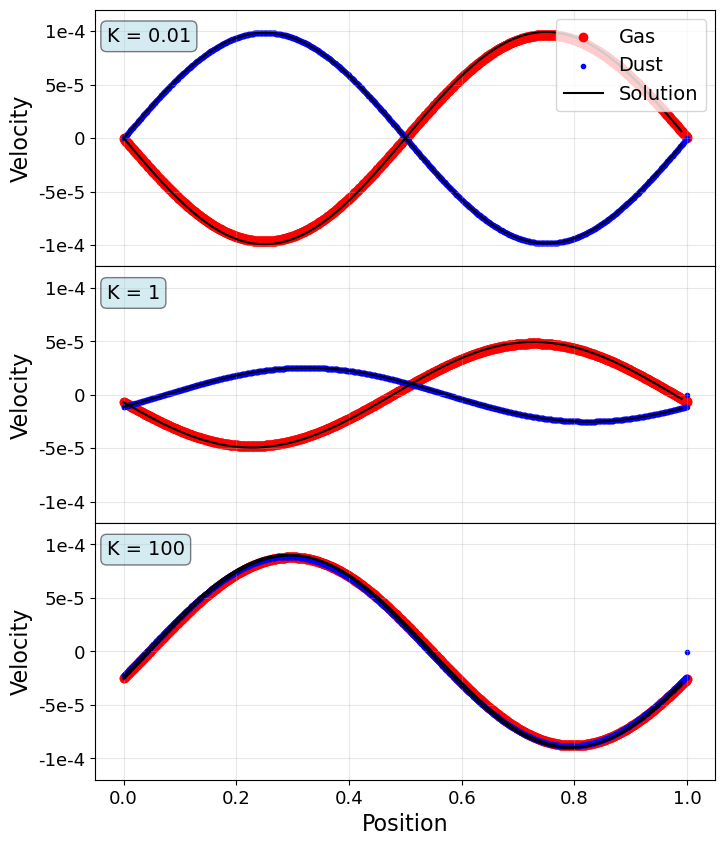

In [6]:
fig, axs = plt.subplots(3,1,figsize=(8,10), sharex=True)

data = np.loadtxt("DUSTYWAVE/output/K001/15.txt")
x = np.linspace(0,1,data.shape[0])
axs[0].scatter(x,data[:,1], color='red', label='Gas')
axs[0].scatter(x,data[:,4], color='blue', label='Dust', marker='.')
sol = np.loadtxt("DUSTYWAVE/analytic/K001/dustywave-t1.500.out")
axs[0].plot(sol[:,0],sol[:,1], color='black', label='Solution')
axs[0].plot(sol[:,0],sol[:,2], color='black')
axs[0].legend(fontsize=14, loc='upper right')


data = np.loadtxt("DUSTYWAVE/output/K1/15.txt")
axs[1].scatter(x,data[:,1], color='red')
axs[1].scatter(x,data[:,4], color='blue', marker='.')
sol = np.loadtxt("DUSTYWAVE/analytic/K1/dustywave-t1.500.out")
axs[1].plot(sol[:,0],sol[:,1], color='black')
axs[1].plot(sol[:,0],sol[:,2], color='black')


data = np.loadtxt("DUSTYWAVE/output/K100/15.txt")
axs[2].scatter(x,data[:,1], color='red')
axs[2].scatter(x,data[:,4], color='blue', marker='.')
sol = np.loadtxt("DUSTYWAVE/analytic/K100/dustywave-t1.500.out")
axs[2].plot(sol[:,0],sol[:,1], color='black')
axs[2].plot(sol[:,0],sol[:,2], color='black')


for ax in axs:
    ax.set_ylim(-0.00012,0.00012)
    y_ticks = [-1e-4, -5e-5, 0, 5e-5, 1e-4]
    y_labels = ["-1e-4", "-5e-5", "0", "5e-5", "1e-4"]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.grid(alpha=0.3)
    ax.set_ylabel("Velocity", fontsize=16)
    ax.tick_params(labelsize=13)

axs[0].text(-0.03, 9e-5, 'K = 0.01', fontsize=14, color='black', bbox=dict(facecolor='lightblue', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))
axs[1].text(-0.03, 9e-5, 'K = 1', fontsize=14, color='black', bbox=dict(facecolor='lightblue', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))
axs[2].text(-0.03, 9e-5, 'K = 100', fontsize=14, color='black', bbox=dict(facecolor='lightblue', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

axs[2].set_xlabel("Position", fontsize=16)
fig.subplots_adjust(hspace=0) 


# DUSTYSHOCK

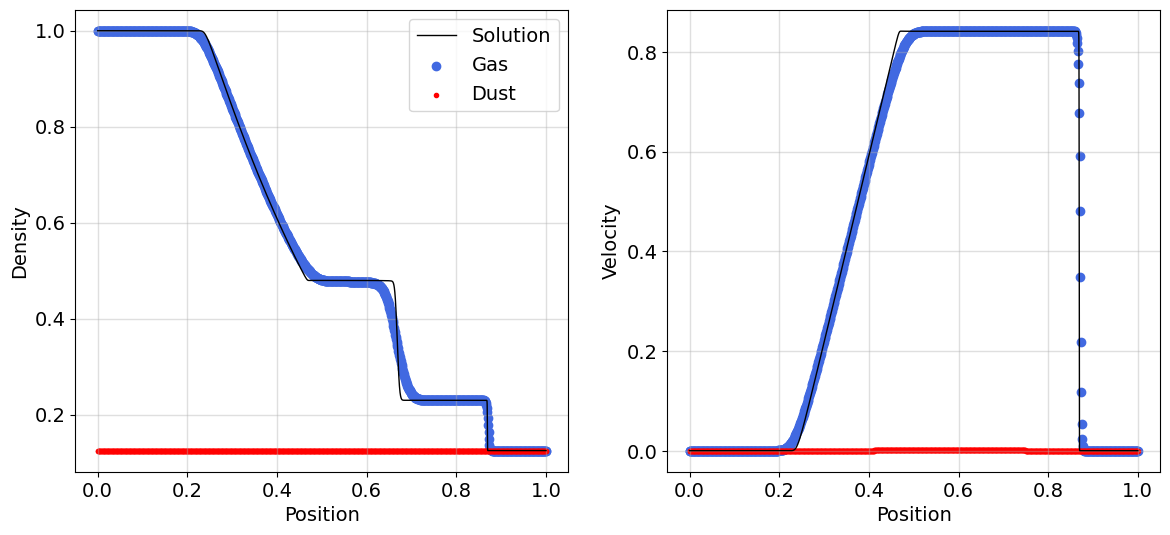

In [4]:
fig, axs = plt.subplots(1,2,figsize=(14,6), sharex=True)
sol = np.loadtxt("DUSTYSHOCK/solution/K0_1D/output20.out")
x = np.linspace(0,1,sol[:,0].shape[0])
axs[1].plot(x,sol[:,2] - sol[:,1]*sol[:,3], color='black',lw=1)
axs[0].plot(x,sol[:,0]*(1-sol[:,1]), color='black',lw=1, label='Solution')

data = np.loadtxt("DUSTYSHOCK/output/K0/20.txt")
x = np.linspace(0,1,data[:,0].shape[0])
axs[0].scatter(x, data[:,0], color='royalblue', label='Gas')
axs[0].scatter(x, data[:,3], color='red', label='Dust', marker='.')

axs[1].scatter(x, data[:,1], color='royalblue')
axs[1].scatter(x, data[:,4], color='red', marker='.')

axs[0].legend(fontsize=14)
axs[1].set_ylabel("Velocity", fontsize=14)
axs[0].set_ylabel("Density", fontsize=14)
for ax in axs:
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(lw=1, alpha=0.4)
    ax.set_xlabel("Position", fontsize=14)


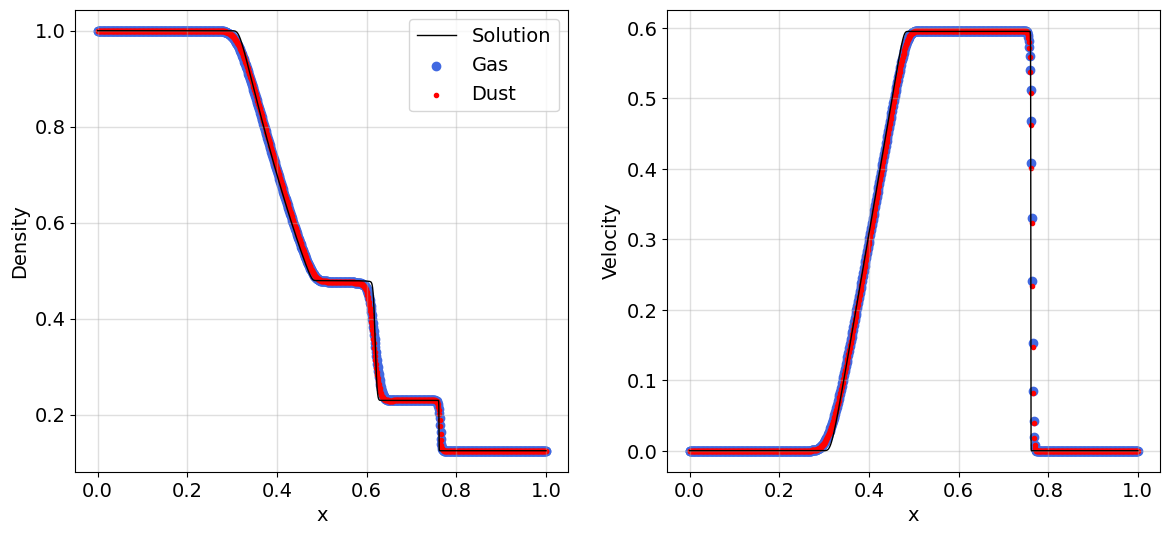

In [5]:
fig, axs = plt.subplots(1,2,figsize=(14,6), sharex=True)
sol = np.loadtxt("DUSTYSHOCK/solution/Kinf_1D/output20.out")
x = np.linspace(0,1,sol[:,0].shape[0])
axs[1].plot(x,sol[:,2] - sol[:,1]*sol[:,3], color='black',lw=1)
axs[0].plot(x,sol[:,0]*(1-sol[:,1]), color='black',lw=1, label='Solution')

data = np.loadtxt("DUSTYSHOCK/output/Kinf/20.txt")
x = np.linspace(0,1,data[:,0].shape[0])
axs[0].scatter(x, data[:,0], color='royalblue', label='Gas')
axs[0].scatter(x, data[:,3], color='red', label='Dust', marker='.')

axs[1].scatter(x, data[:,1], color='royalblue')
axs[1].scatter(x, data[:,4], color='red', marker='.')

axs[0].legend(fontsize=14)
axs[1].set_ylabel("Velocity", fontsize=14)
axs[0].set_ylabel("Density", fontsize=14)
for ax in axs:
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(lw=1, alpha=0.4)
    ax.set_xlabel("x", fontsize=14)
